In [1]:
from eis.vcf_dataloader import SplicingVCFDataloader
from eis import Eis, predict_all_table

from eis.utils import max_varEff

Using TensorFlow backend.
/opt/modules/i12g/anaconda/3-5.0.1/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
gtf = '../tests/data/test.gtf'
vcf = '../tests/data/test.vcf.gz'
fasta = '../tests/data/hg19.nochr.chr17.fa'
gtfIntervalTree = '../tests/data/test.pkl' # pickle exon interval Tree

In [25]:
dl = SplicingVCFDataloader(gtf, 
                          fasta,
                          vcf,
                          out_file=gtfIntervalTree,
                          split_seq=False, overhang=(40,10))

In [26]:
next(dl)

{'inputs': {'intronl_len': 40,
  'intronr_len': 10,
  'seq': 'TGAATTGACACTAATCTCTGCTTGTGTTCTCTGTCTCCAGCAATTGGGCAGATGTGTGAGGCACCTGTGGTGACCCGAGAGTGGGTGTTGGACAGTGTAGCACTCTACCAGTGCCAGGAGCTGGACACCTACCTGATACCCCAGATCCCCCACAGCCACTACTGACTGCAGCCAGCCACAGGTACAGAGCCACAGGACCCCAAGAATGAGCTTACAAAGTGGCCTTTCCAGGCCCTGGGAGCTCCTCTCACTCTTCAGTCCTTCTACTGTCCTGGCTACTAAATATTTTATGTACATCAGCCTGAAAAGGACTTCTGGCTATGCAAGGGTCCCTTAAAGATTTTCTGCTTGAAGTCTCCCTTGGAAATCTGCCATGAGCACAAAATTATGGTAATTTTTCACCTGAGAAGATTTTAAAACCATTTAAACGCCACCAATTGAGCAAGATGCTGATTCATTATTTATCAGCCCTATTCTTTCTATTCAGGCTGTTGTTGGCTTAGGGCTGGAAGCACAGAGTGGCTTGGCCTCAAGAGAATAGCTGGTTTCCCTAAGTTTACTTCTCTAAAACCCTGTGTTCACAAAGGCAGAGAGTCAGACCCTTCAATGGAAGGAGAGTGCTTGGGATCGATTATGTGACTTAAAGTCAGAATAGTCCTTGGGCAGTTCTCAAATGTTGGAGTGGAACATTGGGGAGGAAATTCTGAGGCAGGTATTAGAAATGAAAAGGAAACTTGAAACCTGGGCATGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCAAGGTGGGCAGATCACTGGAGGTCAGGAGTTCGAAACCAGCCTGGCCAACATGGTGAAACCCCATCTCTACTAAAAATACAGAAATTAGCCGGTCATGGTGGTGGACACCTGTAATCCCAGCTACTCAGGTGGCTAAGGCAGGAGAATCAC

In [7]:
model = Eis(
    exon_cut_l=0,
    exon_cut_r=0,
    acceptor_intron_cut=6,
    donor_intron_cut=6,
    acceptor_intron_len=50,
    acceptor_exon_len=3,
    donor_exon_len=5,
    donor_intron_len=13)

/opt/modules/i12g/anaconda/3-5.0.1/lib/python3.6/site-packages/keras/engine/saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [8]:
predictions = predict_all_table(model, dl, batch_size=1024, split_seq=False, assembly=False)


0it [00:00, ?it/s]/opt/modules/i12g/anaconda/3-5.0.1/lib/python3.6/site-packages/eis/eis.py:137: UserWarning: None GT donor
  warnings.warn("None GT donor", UserWarning)
/opt/modules/i12g/anaconda/3-5.0.1/lib/python3.6/site-packages/eis/eis.py:139: UserWarning: None AG donor
  warnings.warn("None AG donor", UserWarning)

1it [00:13, 13.57s/it]
2it [00:14,  7.48s/it]


In [9]:
predictions.head(10)

,ID,exons,EIS_ref_acceptorIntron,EIS_ref_acceptor,EIS_ref_exon,EIS_ref_donor,EIS_ref_donorIntron,EIS_alt_acceptorIntron,EIS_alt_acceptor,EIS_alt_exon,EIS_alt_donor,EIS_alt_donorIntron
0,17:41246758:T:['A'],17_41245601_41246877:-,-2.809684,3.028368,-3.906649,-1.848736,-0.422078,-2.809684,3.028368,-3.890453,-1.848736,-0.422078
1,17:41246758:T:['A'],17_41243452_41246877:-,-2.809684,3.028368,-3.969894,1.006979,0.601201,-2.809684,3.028368,-3.963858,1.006979,0.601201
2,17:41246758:T:['A'],17_41243115_41246877:-,-2.809684,3.028368,-4.043353,-4.489433,0.298620,-2.809684,3.028368,-4.037857,-4.489433,0.298620
3,17:41246758:T:['A'],17_41245587_41246877:-,-2.809684,3.028368,-3.943802,-2.405431,-0.494778,-2.809684,3.028368,-3.927782,-2.405431,-0.494778
4,17:41246758:T:['A'],17_41246129_41246877:-,-2.809684,3.028368,-3.885333,-3.058286,0.449785,-2.809684,3.028368,-3.857719,-3.058286,0.449785
5,17:41246758:T:['A'],17_41245603_41246877:-,-2.809684,3.028368,-3.911511,-4.275981,-0.513952,-2.809684,3.028368,-3.895289,-4.275981,-0.513952
6,17:41246758:T:['A'],17_41246761_41246877:-,-2.809684,3.028368,-3.282780,-0.532455,0.365785,-2.809684,3.028368,-3.282780,-3.326363,0.365785
7,17:41246758:T:['A'],17_41246187_41246877:-,-2.809684,3.028368,-3.831687,-7.038263,0.143091,-2.809684,3.028368,-3.801755,-7.038263,0.143091
8,17:41246759:A:['AC'],17_41245601_41246877:-,-2.809684,3.028368,-3.906649,-1.848736,-0.422078,-2.809684,3.028368,-3.908731,-1.848736,-0.422078
9,17:41246759:A:['AC'],17_41243452_41246877:-,-2.809684,3.028368,-3.969894,1.006979,0.601201,-2.809684,3.028368,-3.970652,1.006979,0.601201


In [10]:
predictionsMax = max_varEff(predictions)

In [11]:
predictionsMax.head()

,ID,EIS_diff,exons,EIS_ref_acceptorIntron,EIS_ref_acceptor,EIS_ref_exon,EIS_ref_donor,EIS_ref_donorIntron,EIS_alt_acceptorIntron,EIS_alt_acceptor,EIS_alt_exon,EIS_alt_donor,EIS_alt_donorIntron
0,17:41246758:T:['A'],-2.793908,17_41246761_41246877:-,-2.809684,3.028368,-3.28278,-0.532455,0.365785,-2.809684,3.028368,-3.28278,-3.326363,0.365785
1,17:41246759:A:['AC'],-2.722293,17_41246761_41246877:-,-2.809684,3.028368,-3.28278,-0.532455,0.365785,-2.809684,3.028368,-3.28278,-3.286452,0.397489
2,17:41246759:A:['G'],-1.844394,17_41246761_41246877:-,-2.809684,3.028368,-3.28278,-0.532455,0.365785,-2.809684,3.028368,-3.28278,-2.376849,0.365785
3,17:41246760:C:['A'],-3.184169,17_41246761_41246877:-,-2.809684,3.028368,-3.28278,-0.532455,0.365785,-2.809684,3.028368,-3.28278,-3.716624,0.365785
4,17:41246760:C:['G'],-3.153795,17_41246761_41246877:-,-2.809684,3.028368,-3.28278,-0.532455,0.365785,-2.809684,3.028368,-3.28278,-3.686250,0.365785


In [15]:
import matplotlib.pyplot as plt 

In [16]:
%matplotlib inline

(array([  3.,   4.,   4.,  20.,  35.,  54.,  59., 228.,  25.,   3.]),
 array([-11.8301003 , -10.26784772,  -8.70559514,  -7.14334255,
         -5.58108997,  -4.01883739,  -2.45658481,  -0.89433223,
          0.66792035,   2.23017293,   3.79242551]),
 <a list of 10 Patch objects>)

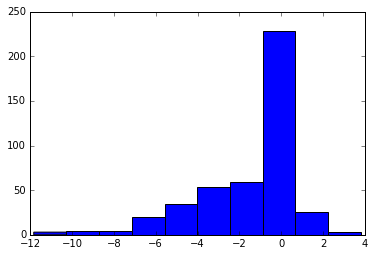

In [18]:
plt.hist(predictionsMax.EIS_diff)

In [24]:
predictionsMax.sort_values(['EIS_diff'])

,ID,EIS_diff,exons,EIS_ref_acceptorIntron,EIS_ref_acceptor,EIS_ref_exon,EIS_ref_donor,EIS_ref_donorIntron,EIS_alt_acceptorIntron,EIS_alt_acceptor,EIS_alt_exon,EIS_alt_donor,EIS_alt_donorIntron
519,17:41267742:CTTGCAAAATATGTGGTCACACTTTGTGGAGACA...,-11.830100,17_41267743_41267796:-,-2.526186,3.332462,-4.171041,3.432806,0.514225,-2.526186,4.727707,-7.341963,-6.697294,0.589903
244,17:41251814:CTTTTGAGGTTGTATCCGCTGCTTTGTCCTCAGA...,-11.499270,17_41251848_41251897:-,-2.890843,-0.061664,-4.859821,-5.846645,0.126789,-3.506656,-8.837604,-7.607969,-5.113680,0.034455
518,17:41267742:CTT:['C'],-10.579810,17_41267743_41267796:-,-2.526186,3.332462,-4.171041,3.432806,0.514225,-2.526186,3.332462,-4.160132,-7.160403,0.516717
584,17:41276033:CCAGATGGGACA:['C'],-10.206254,17_41276034_41276132:-,-2.171624,-0.149763,-3.517247,4.108740,0.346308,-2.171624,-0.149763,-4.229969,-5.474356,0.435872
581,17:41276033:C:['CCAGATG'],-9.776158,17_41276034_41276132:-,-2.171624,-0.149763,-3.517247,4.108740,0.346308,-2.171624,-0.149763,-3.517247,-5.531303,0.210193
512,17:41267740:TACTT:['A'],-9.762102,17_41267743_41267796:-,-2.526186,3.332462,-4.171041,3.432806,0.514225,-2.526186,3.332462,-4.259288,-6.226353,0.499530
412,17:41258471:AC:['A'],-9.624326,17_41258473_41258550:-,-2.165654,3.829097,-3.949009,2.418862,0.473991,-2.165654,3.829097,-3.949009,-7.162730,0.431257
511,17:41267740:TA:['T'],-8.343468,17_41267743_41267796:-,-2.526186,3.332462,-4.171041,3.432806,0.514225,-2.526186,3.332462,-4.171041,-4.927048,0.530612
232,17:41251791:C:['CCCAATTCAATGTAGACAGACGTCTTTTGA...,-8.122242,17_41251792_41251897:-,-2.890843,-0.061664,-2.916002,2.836881,0.683019,-2.890843,-0.061664,-2.916002,-4.569141,-0.033201
503,17:41267736:AACTT:['A'],-7.593237,17_41267743_41267796:-,-2.526186,3.332462,-4.171041,3.432806,0.514225,-2.526186,3.332462,-4.171041,-4.145736,0.499530
